In [1]:
import sys
#sys.path.append('..')
sys.path.append('D:/ATLData/Documents/GitHub/NWIS')
sys.path.append('/Users/aleaf/Documents/GitHub/NWIS')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import fiona
from shapely.geometry import Point, shape
from nwis import NWIS
from GISops import project
from GISio import df2shp

% matplotlib inline

### shapefile of study area

In [2]:
# input files
extent_shp = 'stlbasin.shp' # polygon of study area
epsg = 26915

### reproject the study area polygon to lat/lon

In [3]:
extent_poly = shape(fiona.open(extent_shp).next()['geometry'])
extent_poly_ll = project(extent_poly, "+init=epsg:{}".format(epsg), "+init=epsg:4269")
extent_poly_ll.bounds

(-93.20541291180457, 46.56925900047171, -91.43979489835318, 47.80881846853901)

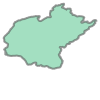

In [4]:
extent_poly_ll

### instantiate NWIS object using polygon
* fetches inventory tables of all dv and misc field measurements within the polygon
* `get_gw_sites` and `get_sw_sites` fetches all daily values and field measurements for groundwater and surface water (default=True)

In [5]:
nwis = NWIS(extent=extent_poly_ll, get_sw_sites=False)

Fetching site info...


### field measurements inventory table

In [6]:
nwis.gwfield_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,qw_begin_date,qw_end_date,qw_count_nu,gw_begin_date,gw_end_date,gw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
402454092380101,402454092380101,057N18W21BAA 01,GW,47.414930,-92.633796,M,S,NAD27,NAD83,27,...,--,--,0,1959-07-09,1959-07-09,1,--,--,0,POINT (-92.6337961 47.41493010000001)
413128092383001,413128092383001,058N18W09BCD 01,GW,47.524372,-92.641848,M,S,NAD27,NAD83,27,...,--,--,0,1958-09-17,1958-09-17,1,--,--,0,POINT (-92.6418484 47.5243715)
422303092490001,422303092490001,057N20W25DBA 01,GW,47.384099,-92.816854,M,S,NAD27,NAD83,27,...,--,--,0,1959-08-11,1959-08-11,1,--,--,0,POINT (-92.81685419999999 47.3840992)
422513092303801,422513092303801,057N17W16CAC 01,GW,47.420207,-92.510741,M,S,NAD27,NAD83,27,...,--,--,0,1958-08-12,1958-08-12,1,--,--,0,POINT (-92.51074079999999 47.4202066)
422526092303902,422526092303902,057N17W16BCD 02,GW,47.423818,-92.511019,M,S,NAD27,NAD83,27,...,--,--,0,1958-08-12,1958-08-12,1,--,--,0,POINT (-92.51101850000001 47.4238176)


### daily values sites inventory table

In [7]:
nwis.gwdv_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,qw_begin_date,qw_end_date,qw_count_nu,gw_begin_date,gw_end_date,gw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
464222092403801,464222092403801,FDLGWSW02 049N18W30BBDA 01 RicePortage 000068...,GW,46.706111,-92.677083,G,S,NAD83,NAD83,27,...,--,--,0,2006-06-01,2010-05-03,30,--,--,0,POINT (-92.67708330000001 46.7061111)
464322092401401,464322092401401,FDLGWSW01 049N18W18CDDD 01 1st Bridge 000068...,GW,46.722750,-92.670417,G,S,NAD83,NAD83,27,...,--,--,0,2006-06-01,2010-05-03,32,--,--,0,POINT (-92.6704167 46.72275)


### write shapefiles of the inventory tables
* `shapely Points` were created from the lat/lon coordinates when the tables were assembled; these are used to write the feature geometries for the shapefiles

In [8]:
df2shp(nwis.gwdv_sites, 'gw_dv_sites.shp', epsg=4269)
df2shp(nwis.gwfield_sites, 'gw_misc_sites.shp', epsg=4269)

writing gw_dv_sites.shp...
writing gw_misc_sites.shp...


### get daily values for a list of sites

In [9]:
sites = nwis.gwdv_sites.site_no.tolist()[0:2]
sites

[464222092403801, 464322092401401]

In [10]:
dvs = nwis.get_all_dvs(sites, 'gwlevels', start_date='1990-01-01')
dvs.keys()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464222092403801&startDT=1990-01-01&parameterCd=72019
http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1990-01-01&parameterCd=72019
Log of query saved to retrieved_gwlevels_dvs_log_20170320111339.csv


dict_keys([464222092403801, 464322092401401])

In [11]:
dvs[464222092403801].head()

,agency_cd,site_no,datetime,74007_72019_00003,74007_72019_00003_cd
datetime,,,,,
2007-01-24,USGS,464222092403801,2007-01-24,8.03,A
2007-10-01,USGS,464222092403801,2007-10-01,8.72,A
2007-10-02,USGS,464222092403801,2007-10-02,8.71,A
2007-10-03,USGS,464222092403801,2007-10-03,8.65,A
2007-10-04,USGS,464222092403801,2007-10-04,8.62,A


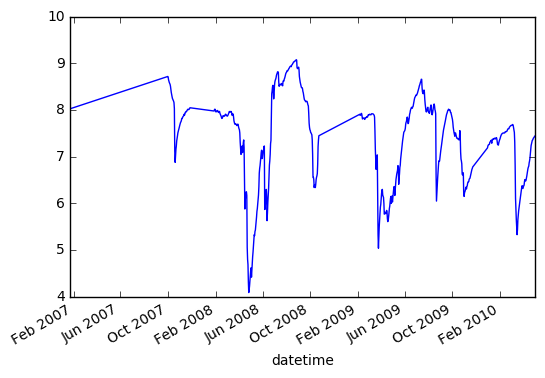

In [12]:
ax = dvs[464222092403801]['74007_72019_00003'].plot()

### get a single site

In [13]:
df = nwis.get_dvs(464322092401401, 'gwlevels')
df.head()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019


,agency_cd,site_no,datetime,74012_72019_00003,74012_72019_00003_cd
datetime,,,,,
2007-01-03,USGS,464322092401401,2007-01-03,4.67,A
2007-10-01,USGS,464322092401401,2007-10-01,5.15,A
2007-10-02,USGS,464322092401401,2007-10-02,5.00,A
2007-10-03,USGS,464322092401401,2007-10-03,4.71,A
2007-10-04,USGS,464322092401401,2007-10-04,4.96,A


### just get the url for dvs for a site
(`start_date` is 1880-01-01 by default; `end_date` is `None` by default)

In [14]:
url = nwis.make_dv_url(464322092401401, parameter_code=72019)
url

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019


'http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019'

## Fetch some miscellaneous measurements

In [15]:
sites = nwis.gwfield_sites.site_no.tolist()[:5]
sites

[402454092380101,
 413128092383001,
 422303092490001,
 422513092303801,
 422526092303902]

In [16]:
fm = nwis.get_all_measurements(sites, txt='gwlevels')

402454092380101
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=402454092380101&agency_cd=USGS&format=rdb
413128092383001
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=413128092383001&agency_cd=USGS&format=rdb
422303092490001
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=422303092490001&agency_cd=USGS&format=rdb
422513092303801
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=422513092303801&agency_cd=USGS&format=rdb
422526092303902
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=422526092303902&agency_cd=USGS&format=rdb
Log of query saved to retrieved_gwlevels_log_20170320111347.csv


In [17]:
fm.head()

,,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd,measurement_dt
site_no,datetime,,,,,,,,,,,,,,,,,
402454092380101,1959-07-09,USGS,402454092380101,GW,1959-07-09,NaN,NaN,5.0,NaN,NaN,NaN,NaN,D,2,U,R,A,1959-07-09
413128092383001,1958-09-17,USGS,413128092383001,GW,1958-09-17,NaN,NaN,24.0,NaN,NaN,NaN,NaN,D,2,U,S,A,1958-09-17
422303092490001,1959-08-11,USGS,422303092490001,GW,1959-08-11,NaN,NaN,12.0,NaN,NaN,NaN,NaN,D,2,U,R,A,1959-08-11
422513092303801,1958-08-12,USGS,422513092303801,GW,1958-08-12,NaN,NaN,20.0,NaN,NaN,NaN,NaN,D,2,U,R,A,1958-08-12
422526092303902,1958-08-12,USGS,422526092303902,GW,1958-08-12,NaN,NaN,25.0,NaN,NaN,NaN,NaN,D,2,U,R,A,1958-08-12
